# Utilizing GPU for training our model
This notebook is an example of how to use GPU to train our model. The model implemented here is LightGBM (Light Gradient Boosting Machine). The features of LightGBM are:

* Faster training speed and higher efficiency.

* Lower memory usage.

* Better accuracy.

* Support of parallel and GPU learning.

* Capable of handling large-scale data.

LightGBM supports parallel and GPU learning, which is the reason why it's a great choice for Kagglers. The actual paper which introduced LightGBM used XGBoost as a baseline model and showed that LightGBM outperformed XGBoost on training time & the dataset size it can handle.

This is the reason why this algorithm gain so much popularity in less time. 

Here, we will use the follwoing dataset:

Link to the competition: https://www.kaggle.com/mlg-ulb/creditcardfraud
THe dataset has 284K rows and 31 features. Also, this is a highly imabalanced dataset. Let's check how much time does LightGBM actually takes to train itself on GPU.

In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
import pycaret


## Loading the data

Dataset information: The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

This dataset was a part of Kaggle Competition too, where the participants needed to predict wether the transaction was a fraud one or normal.

Link to the competition: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
df=pd.read_csv("/content/drive/My Drive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

Our dataset contains 24000 rows and 24 columns

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values as observed from above table

Now, let's check for the count of positive and negative classes in our dataset

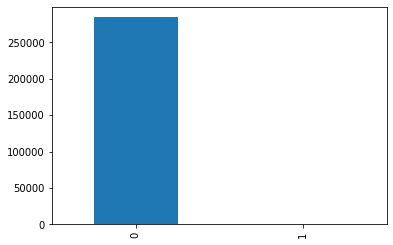

In [ ]:
df["Class"].value_counts().plot.bar(legend=None)

This is a highly imablanced dataset.

## Problem with imbalanced dataset: 
We need to deal with the dataset in a correct way. When we will train our model than our model will achieve high accuracy but our trained model will predict a negative class in maximum number of cases. So, we also need to keep in mind the precision and recall score in such scenarios. 

This problem is predominant in scenarios where anomaly detection is crucial like electricity pilferage, fraudulent transactions in banks, identification of rare diseases, etc. In this situation, the predictive model developed using conventional machine learning algorithms could be biased and inaccurate.

This happens because Machine Learning Algorithms are usually designed to improve accuracy by reducing the error. Thus, they do not take into account the class distribution / proportion or balance of classes.

This guide describes various approaches for solving such class imbalance problems using Pycaret. 

## Prepairing the setup

In [ ]:
from pycaret.classification import *


In [ ]:
clf=setup(data=df,target='Class',fix_imbalance=True) #fix_imbalance will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.

Setup Succesfully Completed!


,Description,Value
0,session_id,1332
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### SMOTE method: SMOTe is a technique based on nearest neighbors judged by Euclidean Distance between data points in feature space. There is a percentage of Over-Sampling which indicates the number of synthetic samples to be created and this percentage parameter of Over-sampling is always a multiple of 100.

In [ ]:
#Uncomment the following code to compare the performance of all the classification models


#compare_models() 

## We will choose the model with high precision because here we need to have a high precision than high accuracy or high recalls.

This link will provide you some overview of precision and recall.
Link: https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

We are creating the random forest classifier because it works really well with these types of dataset. You can have a quick view of the different models using 'compare_models()'

# Using GPU for training our model

Pycaret 2.0 now supports training XGBoost and LightGBM on the GPU. Here, we train a LightGBM(Light Gradient Boosting Machine) on the GPU and it only took around 50 seconds. Earlier training this model on CPU took around 50 minutes. 
We just need to type the following code and execute it:

>create_model('lightgbm', tree_method = 'gpu_hist', gpi_id = 0)

For more information on LightGBM, the link is: https://lightgbm.readthedocs.io/en/latest/

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

classifier=create_model('lightgbm', tree_method = 'gpu_hist', gpi_id = 0)
print(classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9989,0.9622,0.7500,0.6429,0.6923,0.6917,0.6938
1,0.9995,0.9167,0.9167,0.8148,0.8627,0.8625,0.8640
2,0.9989,0.8458,0.7083,0.6538,0.6800,0.6794,0.6800
3,0.9992,0.9145,0.6400,0.8889,0.7442,0.7438,0.7539
4,0.9988,0.9269,0.7083,0.6296,0.6667,0.6661,0.6672
5,0.9996,0.9555,0.9167,0.8462,0.8800,0.8798,0.8805
6,0.9988,0.8878,0.7083,0.6296,0.6667,0.6661,0.6672
7,0.9990,0.9955,0.8333,0.6667,0.7407,0.7402,0.7449
8,0.9994,0.9980,0.8750,0.7778,0.8235,0.8232,0.8246
9,0.9991,0.9691,0.8750,0.6774,0.7636,0.7632,0.7695


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               gpi_id=0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=1332, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0, tree_method='gpu_hist')


## Classification plots

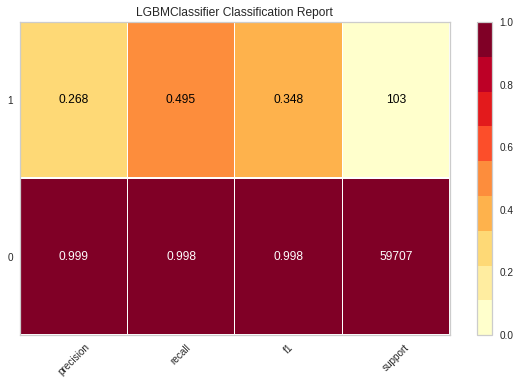

In [ ]:
# Plotting the classification report
plot_model(classifier,plot='class_report')


### Here important point to notice is the precision, recall, and f1 score for the positive class that is '1'

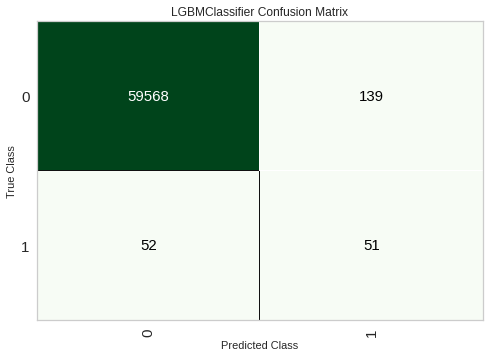

In [ ]:
# Plotting the confusion matrix
plot_model(classifier,plot='confusion_matrix')
